In [1]:
import findspark
findspark.init()
from pyspark import SparkContext

sc = SparkContext("local","quiz")

In [2]:
import numpy as np

In [3]:
def create_setdata(ss):
    record = set()
    for i in ss:
        if i not in record:
            record.add(i)
        else:
            yield record
            record = set()
    if not record:
        yield record


def create_dataset(N):
    while True:
        s = np.random.default_rng().zipf(1.2, N * 10 * 10)
        dataset = list(create_setdata(s[s<N]))
        if len(dataset) >= N:
            break

    ids = range(N)
    return [ (i,s) for i,s in zip(ids,dataset[:N])]


In [19]:
data_list = [1000,2000,4000,8000,16000]
hyper_parameter = 0.85
iteration_count = 50
time_result = []

In [20]:
import time
for dl in data_list:
	time_start = time.time()
	data = create_dataset(dl)
	p_i = sc.broadcast([1/dl for _ in range(dl)])
	inputRDD = sc.parallelize(data).cache()
	for j in range(iteration_count):
		key_pair = inputRDD.flatMap(lambda x:[ (i,p_i.value[x[0]] / len(x[1])) for i in x[1]])
		new_p_i = key_pair.reduceByKey(lambda x,y : x+y)
		post_process_p_i = new_p_i.map(lambda x : (x[0],hyper_parameter*x[1] + (1-hyper_parameter)/dl))

		temp_p_i = [(1-hyper_parameter)/dl for _ in range(dl)]
		result = post_process_p_i.collect()
		for r in result:
			temp_p_i[r[0]] = r[1]
		p_i = sc.broadcast(temp_p_i)
		print(f"{dl}개 데이터 {j}번째 : {p_i.value[0]}")
	time_result.append(time.time()-time_start)


1000개 데이터 0번째 : 0.00015000000000000001
1000개 데이터 1번째 : 0.00015000000000000001
1000개 데이터 2번째 : 0.00015000000000000001
1000개 데이터 3번째 : 0.00015000000000000001
1000개 데이터 4번째 : 0.00015000000000000001
1000개 데이터 5번째 : 0.00015000000000000001
1000개 데이터 6번째 : 0.00015000000000000001
1000개 데이터 7번째 : 0.00015000000000000001
1000개 데이터 8번째 : 0.00015000000000000001
1000개 데이터 9번째 : 0.00015000000000000001
1000개 데이터 10번째 : 0.00015000000000000001
1000개 데이터 11번째 : 0.00015000000000000001
1000개 데이터 12번째 : 0.00015000000000000001
1000개 데이터 13번째 : 0.00015000000000000001
1000개 데이터 14번째 : 0.00015000000000000001
1000개 데이터 15번째 : 0.00015000000000000001
1000개 데이터 16번째 : 0.00015000000000000001
1000개 데이터 17번째 : 0.00015000000000000001
1000개 데이터 18번째 : 0.00015000000000000001
1000개 데이터 19번째 : 0.00015000000000000001
1000개 데이터 20번째 : 0.00015000000000000001
1000개 데이터 21번째 : 0.00015000000000000001
1000개 데이터 22번째 : 0.00015000000000000001
1000개 데이터 23번째 : 0.00015000000000000001
1000개 데이터 24번째 : 0.00015000000000000001
1000개 데이터 

In [21]:
time_result

[3.0456020832061768,
 3.725027084350586,
 6.2517688274383545,
 10.716570854187012,
 15.269682168960571]

In [22]:
import matplotlib.pyplot as plt

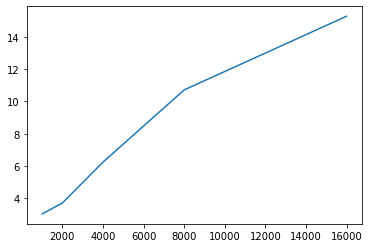

In [26]:
plt.plot(data_list,time_result)
plt.show()